# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [2]:
#libraries
import numpy as np
from collections import Counter
#Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
#QQ plot
from statsmodels.graphics.gofplots import qqplot
# import plotly
# import plotly.express as px
#install this library if not present
# Outlier detection
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

In [3]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.



In [4]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [59]:
df_flights[df_flights['DepDelay']==-1]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
47,2013,7,25,4,MQ,13930,Chicago O'Hare International,Chicago,IL,12451,Jacksonville International,Jacksonville,FL,1245,-1,0.0,1605,7,0,0
52,2013,8,15,4,US,11057,Charlotte Douglas International,Charlotte,NC,14492,Raleigh-Durham International,Raleigh/Durham,NC,1753,-1,0.0,1843,-3,0,0
53,2013,7,1,1,DL,11066,Port Columbus International,Columbus,OH,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,715,-1,0.0,846,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271900,2013,4,15,1,WN,11259,Dallas Love Field,Dallas,TX,10423,Austin - Bergstrom International,Austin,TX,1055,-1,0.0,1145,-3,0,0
271902,2013,8,16,5,WN,13796,Metropolitan Oakland International,Oakland,CA,10800,Bob Hope,Burbank,CA,635,-1,0.0,745,10,0,0
271913,2013,10,22,2,WN,11618,Newark Liberty International,Newark,NJ,15016,Lambert-St. Louis International,St. Louis,MO,705,-1,0.0,845,1,0,0
271917,2013,9,14,6,UA,12264,Washington Dulles International,Washington,DC,15304,Tampa International,Tampa,FL,810,-1,0.0,1032,-19,0,0


In [6]:
# Your code to explore the data
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
Year                 271940 non-null int64
Month                271940 non-null int64
DayofMonth           271940 non-null int64
DayOfWeek            271940 non-null int64
Carrier              271940 non-null object
OriginAirportID      271940 non-null int64
OriginAirportName    271940 non-null object
OriginCity           271940 non-null object
OriginState          271940 non-null object
DestAirportID        271940 non-null int64
DestAirportName      271940 non-null object
DestCity             271940 non-null object
DestState            271940 non-null object
CRSDepTime           271940 non-null int64
DepDelay             271940 non-null int64
DepDel15             269179 non-null float64
CRSArrTime           271940 non-null int64
ArrDelay             271940 non-null int64
ArrDel15             271940 non-null int64
Cancelled            271940 non-null int64
dtypes: float64(1), 

Shape of data is 271940 x 20

By looking above the values we can see number of no null values for each feature present in the dataset and now we will also verify further using isnull()

In [7]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

This query shows there are some null present for this column DepDel15.

In [8]:
df_flights[df_flights.isnull().any(axis=1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


Using the above query we can see the NAN values present for DepDel15 and also the other column values

There are various methods we can explore the to get rid of the missing values:-

1. **Deductive Imputation** - This is an imputation rule by logical reasoning not by statistical rules. it can be a                                 time consuming method and will require some specifice logic based coding
2. **Mean/Median/Mode Imputation** - Here missing is replaced by using mean/mode/median of the column values.
3. **Regression Imputation** - Here we can replace the missing value using the relationship between missing values and                                    other variables.
4. **Stochastic Regression Imputation**- In this along with the regression relationship we also add random error to                                            the predicted value from the regression.
5. **Mutliply-Stochastic Regression Imputation**-  Here we also do the above imputation method but with iterations and                                                    the taking average of the prediction for final result. It is                                                          considered better than the single stochastic regression Imputation.
6. **K-nearest neigbhour(KNN) imputation**- This requires to create a model for each missing  variable that has                                                   missing values.Then we will predict the missing this knn model.
7. **Deleting the missing values**- if the dropping the rows associated with the missing values is not affecting your                                     model you can delete those values.

In [9]:
#Removing the nan values
#For this first  we need to check what are other values for this column so that we can decide which approach to follow to replace the nan values 
df_flights['DepDel15'].value_counts()

0.0    215038
1.0     54141
Name: DepDel15, dtype: int64

By looking at the values we can see there are only two types of values for this column, it is either 1.0 or 0.0 and their is majority of Ones.which indicates type of values for this column is categorical it is either 1 or 0,if departure is delayed or not.

In our case DepDel15 column value can be determined considering the value DepDel, as this column tells number of minutes flight was delayed if time is greater 15 min then value DepDel15 is 1 otherwise it is 0.

In [10]:
df_flights['DepDel15'].mode()

0    0.0
dtype: float64

In [11]:
#Filling the nan values using mode imputation as form of data is categorical
m=df_flights['DepDel15'].isna()
df_flights.loc[m,'DepDel15']=np.where(df_flights.loc[m,'DepDelay']>0,1,0)

#first take we will take those rows where values are nan then use np.where condition to fill those rows missing values 
#using loc we can access those particular rows and columns where we have nan values

In [12]:
#verifying the method
df_flights[df_flights.isnull().any(axis=1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled


In [11]:
#Now we will check for duplicates rows in the data as this will only increase the training time 
df_flights[df_flights.duplicated()]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled


This tells us there are no duplicates for this dataset

Next we will be looking at for Outliers for DepDelay and ArrDelay columns

**Outlier Detection Methods**:-

1. **Standard deviation method** - to use this method first we need to see the distribution of data values, if it is        gaussian distrbution then we can apply this method.if our data follows this distrbution we need to find the mean      and standard deviation of data, we can cut-off those values which lies outside the 3 times standard deviation. if      data is small then we can consider the 2 times the standard deviation.

2. **Interquantile range** - It is static measure which can be used for non-Gaussian distrbuted data. This                  interquantile is  calculated between 75th and 25th percentiles of data.IQR=Q75-Q25,then we multiply this IQR with      kth factor which is usually 1.5, a factor k of 3 or  more if there are extreme outlier which we can check using        whisker plots.

3. **Z-score method** - Z-score[i]=X[i]-mean/standard deviation, it is a parametric method where we examine sample          statitics as representation of population paramters when distribution is normal and data is scaled. Here outlier      are those data points which are at tail of distribution and therefore far from mean.we compare the z-score values      with z-threshold values which are commonly are 2.5,3.0 and 3.5.

4. **Automatic Outlier detection** -
    (i) **Isolation Forest** - This is a non-parametric method for large datasets with one  or mutliodimensional               Feature space.It is a Tree based anomaly detection  algorithm.it is a library present inside sklearn.ensemble.
    (ii) **Minimum Covariance Determinant**- This approach is useful when the input variable has gaussian distribution         and data that falls out the shape is considered an outlier. We use EllipticEnvelope library present inside             sklearn.ensemble.
    (iii) **Local Outlier Factor**- This approach works well with low feature space.It uses the idea of nearest                 neighbors for outlier detection. Here each missing value is assigned a score based on its isolation from               local neigbhourhood. Use LocalOutlierFactor library for this method.
    (iv) **One-class SVM**- This algorithm captures the density of majority class and classifies example on the                extremes of the density function as outliers. Here we use OneClassSVM(nu=0.1) where we need to provide the            value nu which tells approximate ratio of outliers in dataset.
                                 
5. **DBSCAN**- This is based on clustering method(non-parametric method). This methods depends on the required number                of neigbhours and distance.

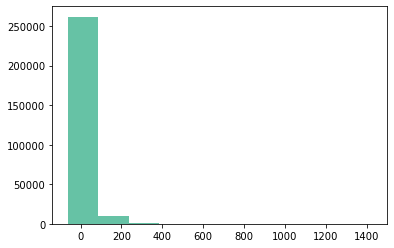

In [13]:
#checking the distribution of depdelay values, if it is bell shaped we have gaussian distrbution
plt.hist(df_flights['DepDelay'])
plt.show()

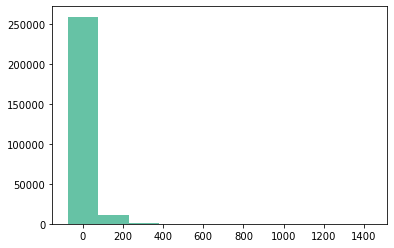

In [14]:
#checking the distribution of Arrdelay values
plt.hist(df_flights['ArrDelay'])
plt.show()

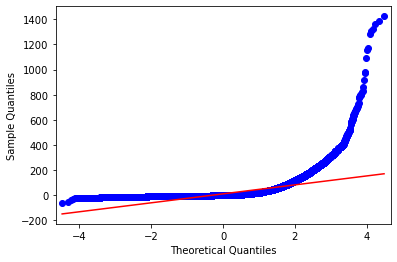

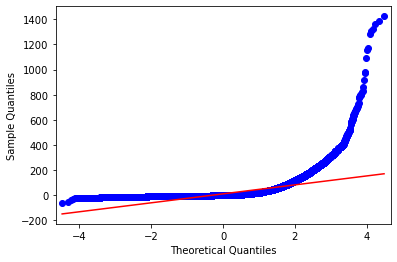

In [15]:
#One more way to check the distrbution is using quantile-quantile plot
qqplot(df_flights['DepDelay'],line='s')

#if datapoints are closely fitting the line then it we can say gaussian distrbution

Looking at this plot we can say that it is not gaussian distrbution as datapoints are not fitting the line.

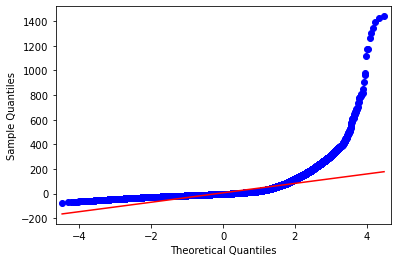

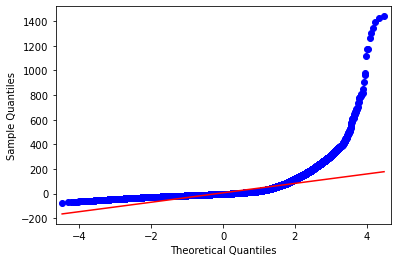

In [16]:
#One more way to check the distrbution is using quantile-quantile plot
qqplot(df_flights['ArrDelay'],line='s')


From these visualization we can clearly say that our variable dont follow gaussian distrbution so we can not use parametric methods. So here methods we can use are IQR,Automatic Outlier Detection,DBSCAN. First we will start with IQR.

In [17]:
#checking for Outliers in DepDelay and ArrDelay columns
df_flights['DepDelay'].value_counts()
# The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)

-3       20322
-2       19754
-4       19430
 0       19282
-5       18495
         ...  
 1158        1
 388         1
 641         1
 384         1
 511         1
Name: DepDelay, Length: 526, dtype: int64

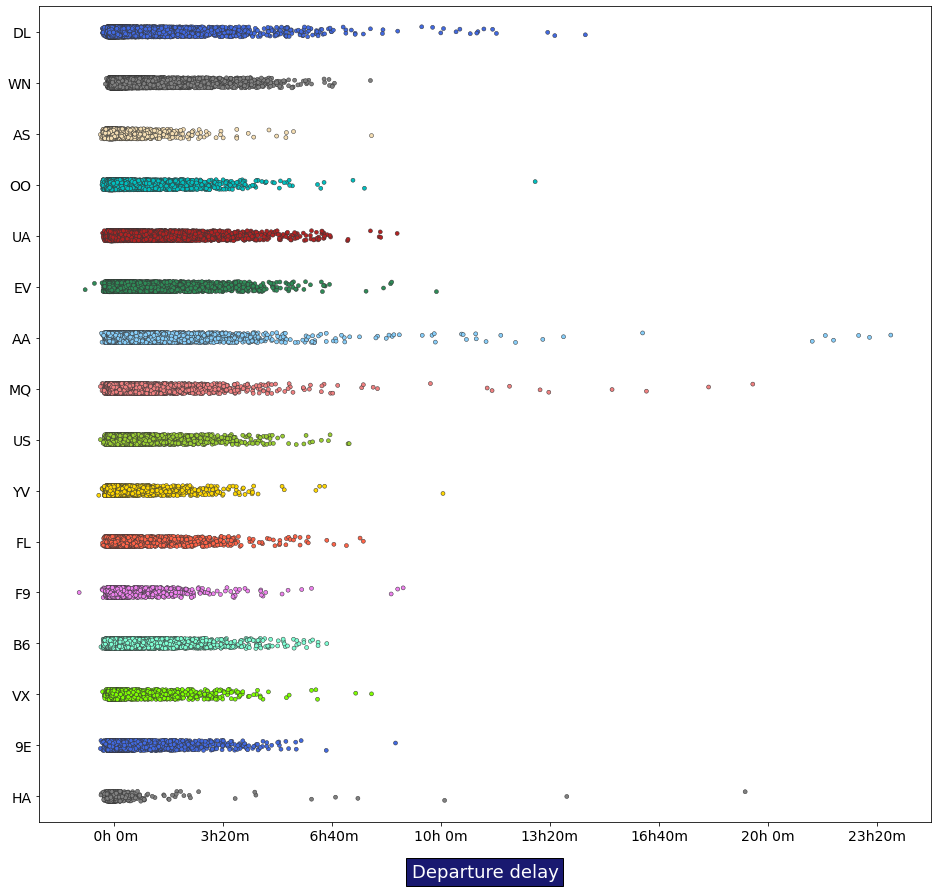

In [18]:
fig = plt.figure(1, figsize=(16,15))
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
ax1 = sns.stripplot(y="Carrier", x="DepDelay", size = 4, palette = colors,
                    data=df_flights, linewidth = 0.5,  jitter=True)
plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
ax1.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax1.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax1.yaxis.label.set_visible(False)

In [20]:
#to get statistical measures
def statictics(variable):
    min_value = variable.min()
    max_value = variable.max()
    mean_value = variable.mean()
    med_value = variable.median()
    mod_value = variable.mode()[0]

    print(variable.name,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_value,
                                                                                            mean_value,
                                                                                            med_value,
                                                                                            mod_value,
                                                                                            max_value))
   
    #boxplot
    plt.figure(figsize=(10,10))
    plt.boxplot(variable,0,'rs',0)


DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



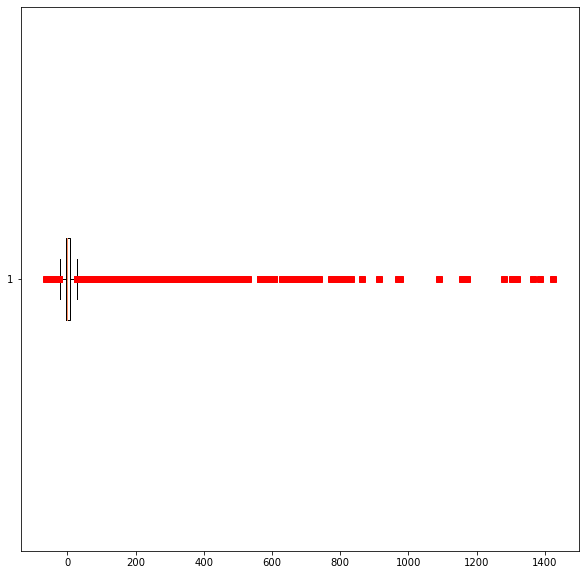

In [21]:
#statistics for dep delay column
statictics(df_flights['DepDelay'])

In [22]:
# calculate interquartile range
q25, q75 = np.percentile(df_flights['DepDelay'], 25), np.percentile(df_flights['DepDelay'], 75)
iqr = q75 - q25
q25-iqr*1.5,q75+iqr*1.5

(-23.5, 28.5)

In [23]:
df_flights['DepDelay'][(df_flights['DepDelay']>28.5) | (df_flights['DepDelay']< -23.5)].count()

34058

Outliers Identified using 25th and 75th quantile are 34058

In [66]:
# calculate interquartile range
q1, q90 = np.percentile(df_flights['DepDelay'], 1), np.percentile(df_flights['DepDelay'], 90)
iqr = q90 - q1
q1-iqr*3.0,q90+iqr*3.0

(-159.0, 184.0)

In [68]:
q1_depdelay=-159.0
q90_depdelay= 184.0

In [25]:
#While multiplying IQR with 1.5
df_flights['DepDelay'][(df_flights['DepDelay']>110.5) | (df_flights['DepDelay']< -85.5)].count()

6604

Outliers Identified using 1st and 90th quantile are 6604.

In [67]:
#While mutlplying IQR with 3.0,to identify strong outliers due to large deviations in data
df_flights['DepDelay'][(df_flights['DepDelay']>184.0) | (df_flights['DepDelay']< -159.0)].count()

2044

Outliers Identified using 1st and 90th quantile are 2044, so lowest number of outliers we can identify using interquantile range are 2044.

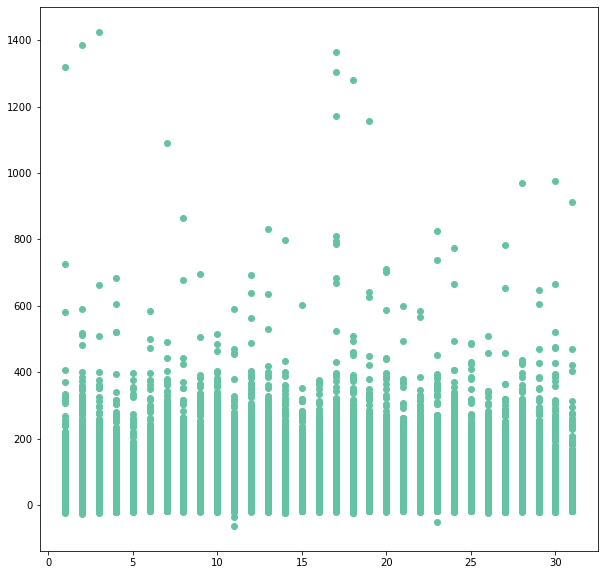

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(df_flights['DayofMonth'],df_flights['DepDelay'])

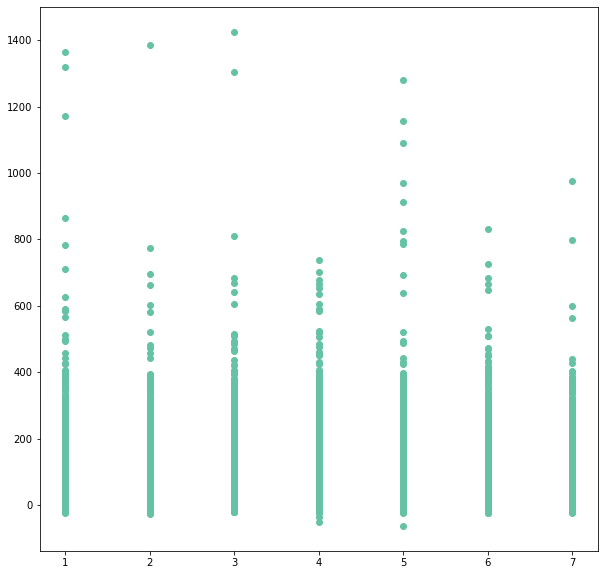

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(df_flights['DayOfWeek'],df_flights['DepDelay'])

## Isolation Forest

In [52]:
clf = IsolationForest(max_samples=800, random_state=42)
table = pd.concat([df_flights['DepDelay']], axis=1)
clf.fit(table)
output_table = pd.DataFrame(clf.predict(table))

In [53]:
output_table[output_table[0]==-1].count()

0    41928
dtype: int64

Outlier identified by isolation forest are 41928.

## DBSCAN

In [58]:
model = DBSCAN(eps = 0.4, min_samples = 100).fit(df_flights[['DepDelay','DayOfWeek']])
labels = model.labels_
#converting the array into dataframe to group by labels and check the counts
labels_df =  pd.DataFrame(labels, columns=['cluster'])
labels_df['cluster'].value_counts()

-1      28761
 115     3086
 28      3070
 58      3036
 24      3025
        ...  
 297      103
 278      103
 311      103
 275      102
 72       100
Name: cluster, Length: 344, dtype: int64

Outliers Identified by DBSCAN are 28761

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



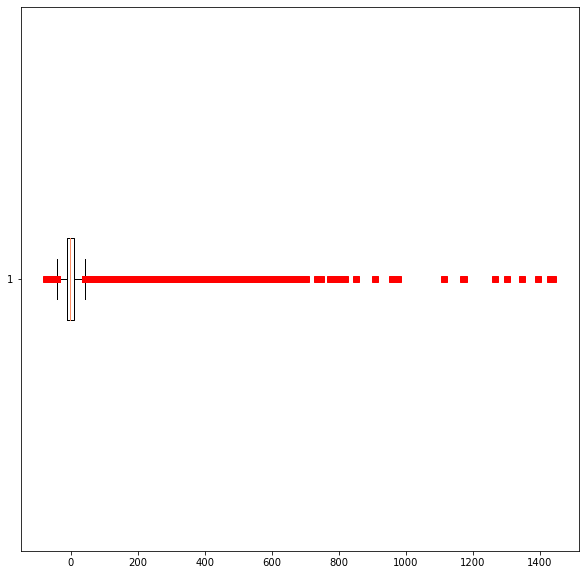

In [28]:
#statistics for Arrival delay column
statictics(df_flights['ArrDelay'])

Looking at these statistics we can see there is large difference between values at maximum and mean

## Interquantile Range

In [63]:
# calculate interquartile range
q25, q75 = np.percentile(df_flights['ArrDelay'], 25), np.percentile(df_flights['ArrDelay'], 75)
iqr = q75 - q25
q25-iqr*3.0,q75+iqr*3.0

(-74.0, 73.0)

In [30]:
df_flights['ArrDelay'][(df_flights['ArrDelay']>41.5) | (df_flights['ArrDelay']>-42.5)].count()

271427

Outliers Identified using 25th and 75th quantile are 271427.

In [64]:
# calculate interquartile range
q1, q90 = np.percentile(df_flights['ArrDelay'], 1), np.percentile(df_flights['ArrDelay'], 90)
iqr = q90 - q1
q1-iqr*3.0,q90+iqr*3.0

(-246.0, 251.0)

In [71]:
q1_arrdelay=-246.0
q90_arrdelay=251.0

In [32]:
#With multplying IQR with 1.5
df_flights['ArrDelay'][(df_flights['ArrDelay']>144.5) | (df_flights['ArrDelay']<-139.5)].count()

3915

In [65]:
#With multplying IQR with 3.0, this allows us to identify strong Outliers as in our case where we have extreme deviation in data
df_flights['ArrDelay'][(df_flights['ArrDelay']>251.0) | (df_flights['ArrDelay']<-246.0)].count()

800

Outliers Identified using 1st and 90th quantile are 3915, so lowest number of outliers we can identify using interquantile range are 3915.

## DBSCAN 

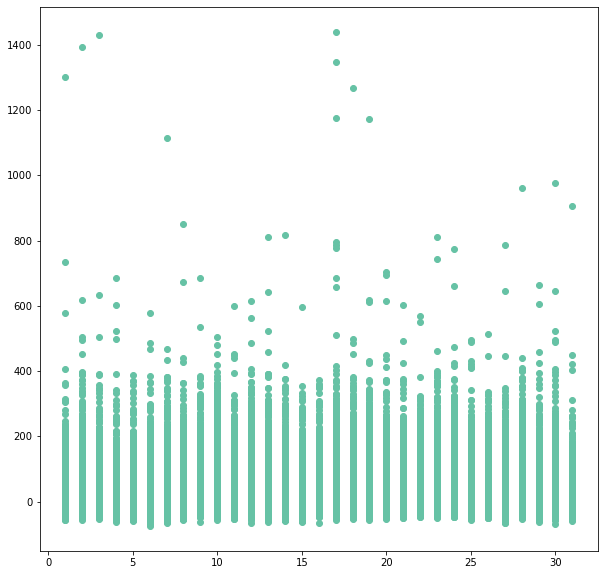

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(df_flights['DayofMonth'],df_flights['ArrDelay'])

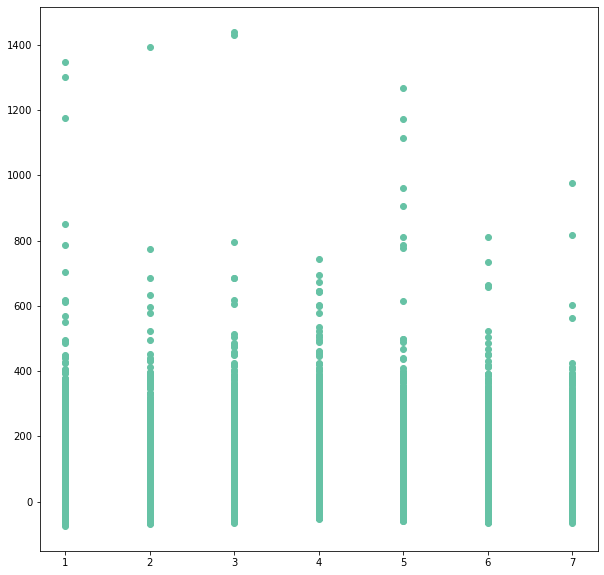

In [102]:
plt.figure(figsize=(10,10))
plt.scatter(df_flights['DayOfWeek'],df_flights['ArrDelay'])

In [62]:
model = DBSCAN(eps=0.8, min_samples=100).fit(df_flights[['ArrDelay','DayOfWeek']])
labels = model.labels_
#converting the array into dataframe to group by labels and check the counts
labels_df =  pd.DataFrame(labels, columns=['cluster'])
labels_df['cluster'].value_counts()

-1      32075
 27      1591
 88      1559
 141     1439
 20      1394
        ...  
 391      102
 247      102
 144      101
 302      101
 399      100
Name: cluster, Length: 463, dtype: int64

Outliers identified by DBSCAN are 32075.

## Automatic Outlier Detection - Isolation Forest

In [39]:
clf = IsolationForest(max_samples=800, random_state=42)
table = pd.concat([df_flights['ArrDelay']], axis=1)
clf.fit(table)
output_table = pd.DataFrame(clf.predict(table))

In [40]:
output_table[output_table[0]==-1].count()

0    37608
dtype: int64

Outlier identified by isolation forest are 37608.Increasing size of sample will reduce number of outliers.

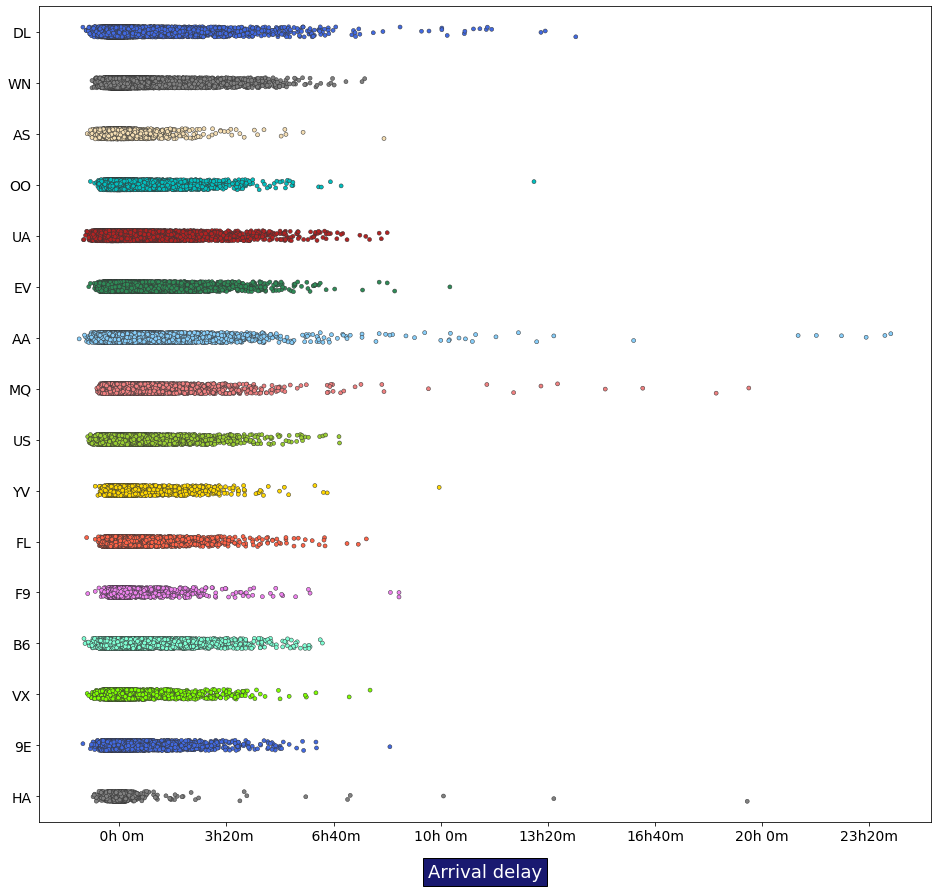

In [41]:
fig = plt.figure(1, figsize=(16,15))
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
ax2 = sns.stripplot(y="Carrier", x="ArrDelay", size = 4, palette = colors,
                    data=df_flights, linewidth = 0.5,  jitter=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
ax2.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax2.get_xticks()])
plt.xlabel('Arrival delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax2.yaxis.label.set_visible(False)

## Removing the Outliers identified by IQR

In [77]:
#DepDelay
df_flights=df_flights[(df_flights['DepDelay']<q90_depdelay) & (df_flights['DepDelay']>q1_depdelay)]

#arrivalDelay

df_flights=df_flights[(df_flights['ArrDelay']<q90_arrdelay) & (df_flights['ArrDelay']>q1_arrdelay)]

## View summary statistics for the numeric fields in the dataset.

In [78]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,269842.0,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000,269842.000000
mean,2013.0,6.982597,15.810519,3.899601,12745.063485,12739.769695,1324.256798,8.387853,0.192865,1504.087340,4.525815,0.209834,0.010762
std,0.0,1.983399,8.802530,1.988052,1501.635685,1502.910423,470.892209,26.157936,0.394548,493.186731,29.429153,0.407191,0.103180
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1118.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1318.500000,-1.000000,0.000000,1526.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1722.000000,9.000000,0.000000,1917.000000,9.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,183.000000,1.000000,2359.000000,249.000000,1.000000,1.000000


## What are the average (mean) departure and arrival delays?s.

In [80]:
print('Dep delay mean:',df_flights['DepDelay'].mean(),',','Arr Delay mean:',df_flights['ArrDelay'].mean())

Dep delay mean: 8.387852891692175 , Arr Delay mean: 4.525815106617947


## How do the carriers compare in terms of arrival delay performance?

In [79]:
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1020,24,1.0,1218,61,1,0
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,1540,30,1.0,1935,15,1,0
271938,2013,5,7,2,HA,13830,Kahului Airport,Kahului,HI,12173,Honolulu International,Honolulu,HI,609,-5,0.0,641,-6,0,0


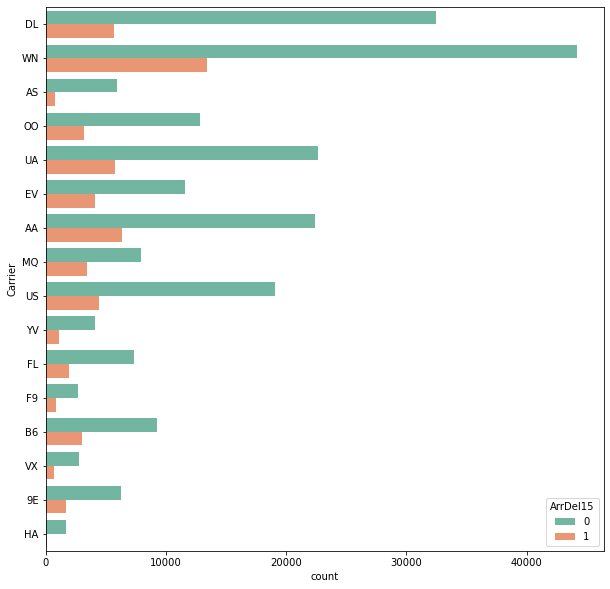

In [83]:
fig=plt.figure(1,figsize=(10,10))
ax=sns.countplot(y='Carrier',hue='ArrDel15',data=df_flights)

looking at the plot we can see WN carrier is highest count for on time flights(with delay less than 15 minutes) and also for delay more than 15 minutes.


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


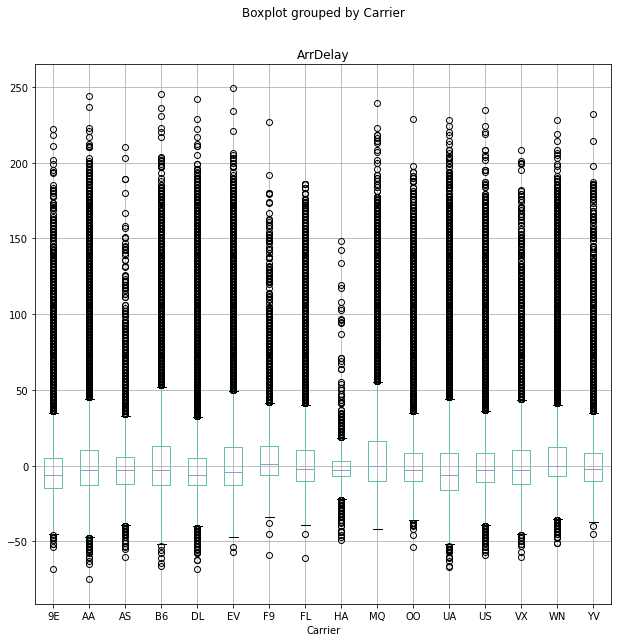

In [86]:
df_flights.boxplot(column='ArrDelay',by='Carrier',figsize=(10,10))

## Are some days of the week more prone to arrival delay than others?

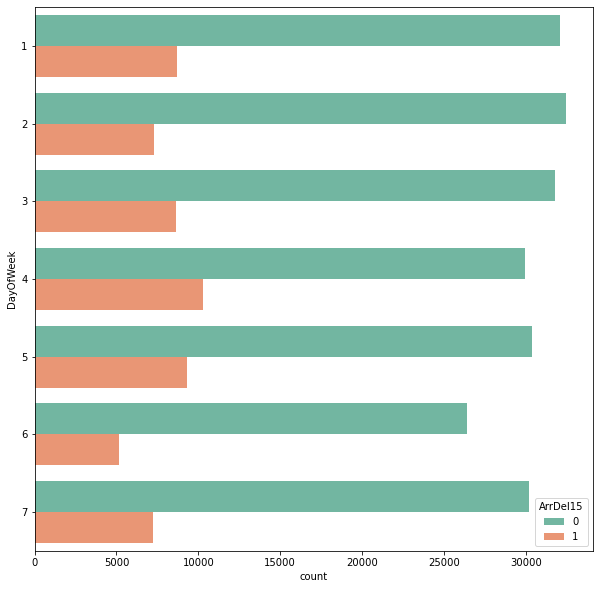

In [87]:
fig=plt.figure(1,figsize=(10,10))
ax=sns.countplot(y='DayOfWeek',hue='ArrDel15',data=df_flights)

Looking at the plot 4th day of the week is more prone arrival delays.

## Which departure airport has the highest average departure delay?

In [92]:
df_flights.groupby(df_flights['DestAirportName'])['DepDelay'].mean().sort_values(ascending=False)

DestAirportName
San Francisco International                  15.598083
Newark Liberty International                 13.841814
LaGuardia                                    12.409318
Will Rogers World                            12.338790
Louisville International-Standiford Field    11.405123
                                               ...    
Seattle/Tacoma International                  4.714358
Salt Lake City International                  4.713526
Long Beach Airport                            3.412756
Kahului Airport                               2.607794
Honolulu International                        2.410047
Name: DepDelay, Length: 70, dtype: float64

San Francisco International has the highest average departure delay

## Do late departures tend to result in longer arrival delays than on-time departures?

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 1080x720 with 0 Axes>

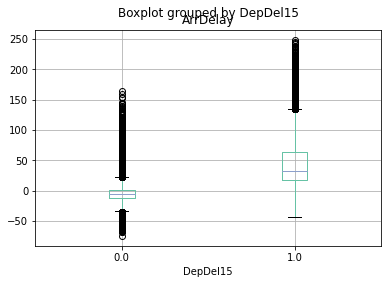

In [96]:
fig=plt.figure(1,figsize=(15,10))
df_flights.boxplot(column='ArrDelay',by='DepDel15')

Mean of arrival delay of flights with departure on time is low as compared to flights with departure delay also. This tends to show that late departure results in longer arrival days.

## Which route (from origin airport to destination airport) has the most late arrivals?

In [100]:
df_flights.groupby(['OriginAirportName','DestAirportName'])['ArrDel15'].sum().sort_values(ascending=False)

OriginAirportName                         DestAirportName                         
Los Angeles International                 San Francisco International                 314
San Francisco International               Los Angeles International                   281
LaGuardia                                 Hartsfield-Jackson Atlanta International    187
McCarran International                    San Francisco International                 183
Hartsfield-Jackson Atlanta International  LaGuardia                                   164
                                                                                     ... 
Ronald Reagan Washington National         William P Hobby                               0
Lambert-St. Louis International           Cleveland-Hopkins International               0
Tucson International                      Albuquerque International Sunport             0
Ronald Reagan Washington National         Theodore Francis Green State                  0
Port Columbus Int

Los Angeles International------->San Francisco International

## Which route has the highest average arrival delay?

In [101]:
df_flights.groupby(['OriginAirportName','DestAirportName'])['ArrDelay'].mean().sort_values(ascending=False)

OriginAirportName                   DestAirportName             
Pittsburgh International            Raleigh-Durham International    63.000000
Metropolitan Oakland International  Logan International             54.111111
Newark Liberty International        Will Rogers World               47.277778
Southwest Florida International     Theodore Francis Green State    44.000000
Dallas/Fort Worth International     Kahului Airport                 41.411765
                                                                      ...    
Eppley Airfield                     LaGuardia                      -22.200000
Jacksonville International          Chicago Midway International   -22.727273
John F. Kennedy International       San Antonio International      -23.083333
Denver International                Kahului Airport                -25.500000
Indianapolis International          Logan International            -26.000000
Name: ArrDelay, Length: 2483, dtype: float64

Pittsburgh International------>Raleigh-Durham International 

Note: Answers will vary depending upon the preprocessing steps taken to clean the data.